In [1]:
import json
with open('word_lists.json', 'r') as json_file:
    loaded_word_lists = json.load(json_file)

In [81]:
# Define your original model paths and their corresponding bootstrapped models
model_paths = {
    'Original': [

    # "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_gendered_word2vec_model_100_percent.model"#,
    "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/gendered_models/gendered_newest_bootstrap_word2vec_model_9.model",
    "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/gendered_models/gendered_newest_bootstrap_word2vec_model_8.model",
    "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/gendered_models/gendered_newest_bootstrap_word2vec_model_7.model",
    "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/gendered_models/gendered_newest_bootstrap_word2vec_model_6.model",
    "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/gendered_models/gendered_newest_bootstrap_word2vec_model_5.model",
    "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/gendered_models/gendered_newest_bootstrap_word2vec_model_4.model",
    "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/gendered_models/gendered_newest_bootstrap_word2vec_model_3.model",
    "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/gendered_models/gendered_newest_bootstrap_word2vec_model_2.model",
    "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/gendered_models/gendered_newest_bootstrap_word2vec_model_1.model",
    "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_gendered_word2vec_model_50_percent.model",



    ]
    

}

In [67]:

# import gensim
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.spatial.distance import cosine
# from scipy.stats import spearmanr, pearsonr
# from collections import defaultdict
# plt.style.use("default")

# # Function to compute average vector
# def compute_average_vector(words, model):
#     vector_sum = 0
#     count = 0
#     for word in words:
#         if word in model.wv.key_to_index:
#             vector_sum += model.wv[word]
#             count += 1
#     return vector_sum / count if count != 0 else None

# # Function to construct meaning cluster
# def construct_meaning_cluster(term, opposite_term, model, n, loaded_word_lists):
#     neighbors = [w for w, _ in model.wv.most_similar(term, topn=n) if "_" not in w and w != opposite_term]
#     neighbors = [term] + neighbors  # Include the term itself as the first neighbor
#     neighbors.extend(loaded_word_lists.get(term, []))  # Extend with synonyms
#     return list(set(neighbors))  # Remove duplicates

# def compute_correlations(years, similarities):
#     # pearson_corr, pearson_pval = pearsonr(years, similarities)
#     spearman_corr, spearman_pval = spearmanr(years, similarities)
#     return spearman_corr, spearman_pval

# # Define years range
# years = range(2013, 2023)
# vegan_terms = ['vegan', 'vegans', 'veganism']
# # vegan_terms = ['vegans']



# # vegan_terms = ['tinder']


# term_pairs = [
#     ('inexpensive', 'expensive'),
#     ('sustainable', 'unsustainable'),
#     ('tasty', 'tasteless'),
#     ('healthy', 'unhealthy'),
#     ('ethical', 'unethical'),
#     ('natural', 'unnatural'),
#     ('convenient', 'inconvenient')
# ]

# # term_pairs = top_20_pairs

# n_neighbors = 25  # Number of closest neighbors to find
# # Dictionary to collect dataset-wide similarities for each aggregated model
# dataset_similarities_by_model = defaultdict(list)

# # Dictionary to define model paths
# # Replace 'model_path_1' with the actual path of the model
# plt.figure(figsize=(10, 6))

# for pair in term_pairs:

#     for model_name, bootstrap_models in model_paths.items():
#         aggregated_term_similarities_by_year = []
        
#         for model_path in bootstrap_models:


#             # Load the model
#             model = gensim.models.Word2Vec.load(model_path)


#             # Compute average vegan vector for each year


#             vegan_vectors_by_year = [compute_average_vector([f"askmen_{term}_{year}" for term in vegan_terms], model) for year in years]
#             vegan_vectors_by_year = [v for v in vegan_vectors_by_year if v is not None]

#             # Construct meaning clusters
#             pos_cluster = construct_meaning_cluster(pair[0], pair[1], model, n_neighbors, loaded_word_lists)
#             neg_cluster = construct_meaning_cluster(pair[1], pair[0], model, n_neighbors, loaded_word_lists)

#             # Remove common words from opposing word clusters
#             pos_cluster = [w for w in pos_cluster if w not in neg_cluster]
#             neg_cluster = [w for w in neg_cluster if w not in pos_cluster]


            
#             # Compute before and after vectors
#             before_vector = compute_average_vector(neg_cluster, model)
#             after_vector = compute_average_vector(pos_cluster, model)
            
#             if before_vector is None or after_vector is None:
#                 continue  # Skip to next iteration if either vector is None

#             # Compute projection vector
#             projection_vector = after_vector - before_vector

#             # Project the averaged vegan-related vectors onto the projection vector
#             projected_similarities_by_year = [1 - cosine(projection_vector, vegan_vector) for vegan_vector in vegan_vectors_by_year]

#             if projected_similarities_by_year:
#                 aggregated_term_similarities_by_year.append(projected_similarities_by_year)
#         # print(pos_cluster)
#         # print(neg_cluster)

#         # Average the term similarities across bootstrapped models
#         mean_term_similarities = np.mean(aggregated_term_similarities_by_year, axis=0)

#         # Calculate the standard error
#         standard_error = np.std(aggregated_term_similarities_by_year, axis=0) / np.sqrt(len(aggregated_term_similarities_by_year))

#         # Calculate the 95% confidence interval
#         lower_bound = mean_term_similarities - 1.96 * standard_error
#         upper_bound = mean_term_similarities + 1.96 * standard_error

#         # Add to dataset-wide list
#         dataset_similarities_by_model[model_name].append(mean_term_similarities)

#         # Plot the mean similarities
#         plt.plot(years[:len(mean_term_similarities)], mean_term_similarities, label=f"{pair}")#, label=f"Aggregated Model: {model_name}")

#         print(pair)

#         print(f"Mean SDS = {np.mean(mean_term_similarities)}")

#         # Plot the 95% confidence interval as a shaded area
#         plt.fill_between(years[:len(mean_term_similarities)], lower_bound, upper_bound, alpha=0.2)#, label='95% CI')

#         print(compute_correlations(years, mean_term_similarities))

# plt.xlabel('Year')
# plt.ylabel('SDS')
# plt.ylim(-0.15,0.35)
# plt.title('Veganism Perception Trend Across Different Dimensions')
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
# plt.grid(True)
# plt.tight_layout()  # Adjust layout to prevent clipping
# plt.show()

# # Dataset-wide analysis
# plt.figure(figsize=(10, 6))

# for model_name in model_paths.keys():
#     aggregated_dataset_similarities = np.mean(dataset_similarities_by_model[model_name], axis=0)
#     plt.plot(years[:len(aggregated_dataset_similarities)], aggregated_dataset_similarities, label=f"Aggregated Model: {model_name}")
#     print(compute_correlations(years,aggregated_dataset_similarities))


# plt.xlabel('Year')
# plt.ylabel('Mean Similarity Score')
# plt.title('Dataset-wide Mean Similarity Trend')
# plt.legend()
# plt.grid(True)
# plt.show()






In [68]:
import pandas as pd

# Other imports remain the same

# Function to find top 50 nearest vectors
def top_100_nearest_vectors(vector, model):
    if vector is not None:
        return [word for word, _ in model.wv.similar_by_vector(vector, topn=100)]
    else:
        return []


def top_100_nearest_vectors_not_temporal(vector, model):
    if vector is not None:
        all_nearest = model.wv.similar_by_vector(vector, topn=400)
        filtered_nearest = [word for word, _ in all_nearest if '_2' not in word][:30]
        return filtered_nearest
    else:
        return []


('inexpensive', 'expensive')
Mean SDS = -0.12034223686903715
(0.01818181818181818, 0.9602404181286243)
('sustainable', 'unsustainable')
Mean SDS = 0.1639983205124736
(0.8909090909090909, 0.0005421442248338665)
('tasty', 'tasteless')
Mean SDS = 0.3396022748947144
(0.8666666666666665, 0.0011735381801554687)
('healthy', 'unhealthy')
Mean SDS = 0.07856323686894029
(0.32121212121212117, 0.3654683104386702)
('ethical', 'unethical')
Mean SDS = 0.04013334638555534
(0.5151515151515151, 0.12755286970323426)
('natural', 'unnatural')
Mean SDS = 0.07262405469547957
(0.8666666666666665, 0.0011735381801554687)
('convenient', 'inconvenient')
Mean SDS = 0.07435352127533405
(0.7939393939393938, 0.0060999233136969115)


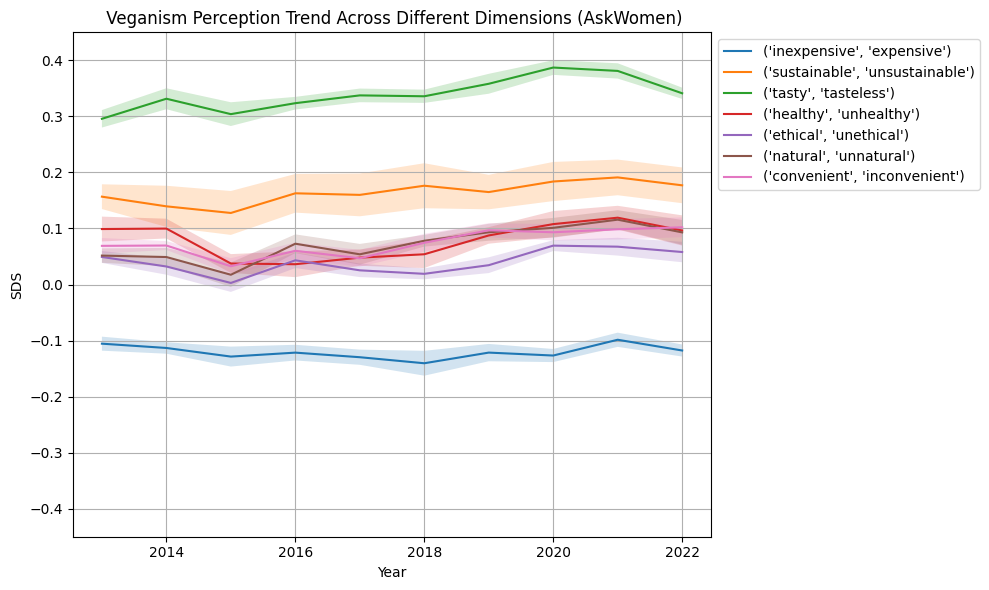

(0.6484848484848483, 0.04254012768448945)


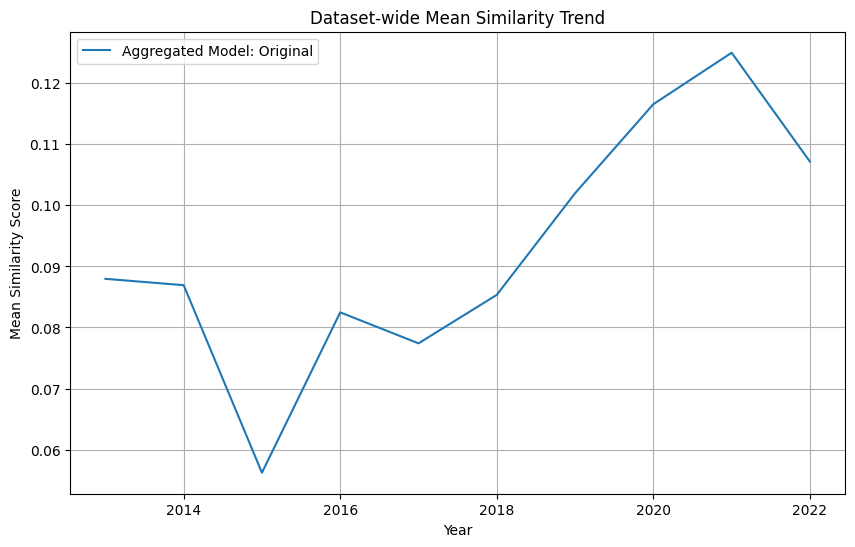

In [82]:

import gensim
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from scipy.stats import spearmanr, pearsonr
from collections import defaultdict
plt.style.use("default")

# Function to compute average vector
def compute_average_vector(words, model):
    vector_sum = 0
    count = 0
    for word in words:
        if word in model.wv.key_to_index:
            vector_sum += model.wv[word]
            count += 1
    return vector_sum / count if count != 0 else None

# Function to construct meaning cluster
def construct_meaning_cluster(term, opposite_term, model, n, loaded_word_lists):
    neighbors = [w for w, _ in model.wv.most_similar(term, topn=n) if "_" not in w and w != opposite_term]
    neighbors = [term] + neighbors  # Include the term itself as the first neighbor
    neighbors.extend(loaded_word_lists.get(term, []))  # Extend with synonyms
    return list(set(neighbors))  # Remove duplicates

def compute_correlations(years, similarities):
    # pearson_corr, pearson_pval = pearsonr(years, similarities)
    spearman_corr, spearman_pval = spearmanr(years, similarities)
    return spearman_corr, spearman_pval

# Define years range
years = range(2013, 2023)
vegan_terms = ['vegan', 'vegans', 'veganism']
# vegan_terms = ['vegan']



# vegan_terms = ['tinder']


term_pairs = [
    ('inexpensive', 'expensive'),
    ('sustainable', 'unsustainable'),
    ('tasty', 'tasteless'),
    ('healthy', 'unhealthy'),
    ('ethical', 'unethical'),
    ('natural', 'unnatural'),
    ('convenient', 'inconvenient')
]

# term_pairs = top_20_pairs

n_neighbors = 25  # Number of closest neighbors to find
# Dictionary to collect dataset-wide similarities for each aggregated model
dataset_similarities_by_model = defaultdict(list)

# Dictionary to define model paths
# Replace 'model_path_1' with the actual path of the model
plt.figure(figsize=(10, 6))

for pair in term_pairs:

    for model_name, bootstrap_models in model_paths.items():
        aggregated_term_similarities_by_year = []
        
        for model_path in bootstrap_models:


            # Load the model
            model = gensim.models.Word2Vec.load(model_path)

            # Compute average vegan vector for each year
            vegan_vectors_by_year = [compute_average_vector([f"askwomen_{term}_{year}" for term in vegan_terms], model) for year in years]
            vegan_vectors_by_year = [v for v in vegan_vectors_by_year if v is not None]



            # Construct meaning clusters
            pos_cluster = construct_meaning_cluster(pair[0], pair[1], model, n_neighbors, loaded_word_lists)
            neg_cluster = construct_meaning_cluster(pair[1], pair[0], model, n_neighbors, loaded_word_lists)

            # Remove common words from opposing word clusters
            pos_cluster = [w for w in pos_cluster if w not in neg_cluster]
            neg_cluster = [w for w in neg_cluster if w not in pos_cluster]


            
            # Compute before and after vectors
            before_vector = compute_average_vector(neg_cluster, model)
            after_vector = compute_average_vector(pos_cluster, model)
            
            if before_vector is None or after_vector is None:
                continue  # Skip to next iteration if either vector is None

            # Compute projection vector
            projection_vector = after_vector - before_vector

            # Project the averaged vegan-related vectors onto the projection vector
            projected_similarities_by_year = [1 - cosine(projection_vector, vegan_vector) for vegan_vector in vegan_vectors_by_year]

            if projected_similarities_by_year:
                aggregated_term_similarities_by_year.append(projected_similarities_by_year)



            # Define a dictionary to hold the top 50 nearest vectors per year
            nearest_vectors_per_year = defaultdict(list)
            nearest_vectors_per_year_no_temporal = defaultdict(list)



            for year, vegan_vector in zip(years, vegan_vectors_by_year):
                nearest_vectors = top_100_nearest_vectors(vegan_vector, model)
                nearest_vectors_per_year[year].extend(nearest_vectors)

                nearest_vectors_no_temporal = top_100_nearest_vectors_not_temporal(vegan_vector, model)
                nearest_vectors_per_year_no_temporal[year].extend(nearest_vectors_no_temporal)

# Convert the dictionary to a DataFrame
            nearest_vectors_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in nearest_vectors_per_year.items()]))
            nearest_vectors_df_no_temporal = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in nearest_vectors_per_year_no_temporal.items()]))
# Your existing plotting code remains the same

        # print(pos_cluster)
        # print(neg_cluster)

        # Average the term similarities across bootstrapped models
        mean_term_similarities = np.mean(aggregated_term_similarities_by_year, axis=0)

        # Calculate the standard error
        standard_error = np.std(aggregated_term_similarities_by_year, axis=0) / np.sqrt(len(aggregated_term_similarities_by_year))

        # Calculate the 95% confidence interval
        lower_bound = mean_term_similarities - 1.96 * standard_error
        upper_bound = mean_term_similarities + 1.96 * standard_error

        # Add to dataset-wide list
        dataset_similarities_by_model[model_name].append(mean_term_similarities)

        # Plot the mean similarities
        plt.plot(years[:len(mean_term_similarities)], mean_term_similarities, label=f"{pair}")#, label=f"Aggregated Model: {model_name}")

        print(pair)

        print(f"Mean SDS = {np.mean(mean_term_similarities)}")

        # Plot the 95% confidence interval as a shaded area
        plt.fill_between(years[:len(mean_term_similarities)], lower_bound, upper_bound, alpha=0.2)#, label='95% CI')

        print(compute_correlations(years, mean_term_similarities))

plt.xlabel('Year')
plt.ylabel('SDS')
plt.ylim(-0.45,0.45)
plt.title(' Veganism Perception Trend Across Different Dimensions (AskWomen)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Dataset-wide analysis
plt.figure(figsize=(10, 6))

for model_name in model_paths.keys():
    aggregated_dataset_similarities = np.mean(dataset_similarities_by_model[model_name], axis=0)
    plt.plot(years[:len(aggregated_dataset_similarities)], aggregated_dataset_similarities, label=f"Aggregated Model: {model_name}")
    print(compute_correlations(years,aggregated_dataset_similarities))


plt.xlabel('Year')
plt.ylabel('Mean Similarity Score')
plt.title('Dataset-wide Mean Similarity Trend')
plt.legend()
plt.grid(True)
plt.show()



In [78]:
nearest_vectors_df[:10]

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,askmen_vegan_2022,askwomen_vegan_2014,askwomen_vegan_2015,askwomen_vegan_2016,askwomen_vegan_2017,askwomen_vegan_2018,askwomen_vegan_2019,askwomen_vegan_2020,askwomen_vegan_2021,askwomen_vegan_2022
1,askwomen_vegan_2013,askwomen_vegans_2014,askwomen_vegans_2015,askwomen_veganism_2016,askwomen_vegans_2017,askwomen_vegans_2018,askmen_vegan_2020,askmen_vegan_2020,askmen_vegan_2020,askmen_vegan_2020
2,askwomen_vegans_2013,askmen_vegan_2021,askmen_vegan_2015,askwomen_vegans_2016,askwomen_veganism_2017,askmen_vegans_2017,askmen_vegan_2017,askmen_vegan_2019,askmen_vegan_2017,askmen_vegan_2019
3,askmen_vegan_2021,askmen_vegan_2022,askmen_vegans_2013,askmen_vegan_2016,askmen_vegans_2013,askmen_vegan_2017,askmen_vegan_2019,askmen_vegan_2017,askmen_vegans_2017,askmen_vegan_2021
4,askmen_vegans_2019,askmen_vegan_2020,askmen_vegan_2018,askmen_vegans_2013,askmen_vegan_2017,askmen_vegan_2020,askmen_vegan_2018,askmen_vegan_2018,askmen_vegan_2021,askmen_vegans_2017
5,askwomen_veganism_2013,askmen_vegans_2017,askmen_vegan_2019,askmen_vegan_2017,askmen_vegans_2017,askmen_vegans_2013,askwomen_vegans_2019,askwomen_vegan_2021,askmen_vegan_2019,askmen_vegan_2017
6,askwomen_alexa_2013,askmen_vegan_2019,askmen_vegans_2017,askmen_vegan_2015,askwomen_vegans_2019,askwomen_vegans_2019,askmen_vegan_2016,askmen_vegan_2021,askmen_vegan_2018,askmen_vegan_2018
7,askwomen_telegram_2013,askmen_vegan_2018,askmen_vegan_2020,askmen_vegan_2018,askmen_vegan_2018,askwomen_vegan_2021,askmen_vegans_2017,askwomen_vegans_2020,askwomen_vegans_2021,askwomen_vegans_2019
8,askmen_vegans_2021,askwomen_vegans_2020,askmen_vegan_2017,askwomen_vegans_2019,askwomen_vegans_2020,askmen_vegan_2018,askmen_vegan_2021,askwomen_vegan_2022,askwomen_veganism_2021,askmen_vegan_2022
9,askmen_vegans_2018,askmen_vegan_2017,askwomen_vegans_2019,vegetarianism,askmen_vegan_2019,askmen_vegan_2016,askmen_vegan_2015,askmen_vegans_2017,askmen_vegan_2015,askmen_vegans_2013


In [79]:
nearest_vectors_df_no_temporal[:10]

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,wallstreetbets,nonvegan,vegetarians,vegetarianism,vegetarianism,vegetarians,carnivore,nonvegan,carnivore,nonvegan
1,wdym,pescatarian,carnivore,carnivore,vegetarians,vegetarian,nonvegan,pescatarian,vegetarianism,carnivore
2,intresting,carnivore,nonvegan,vegetarians,carnivore,vegetarianism,omnivore,carnivore,plantbased,pescatarian
3,nnn,glutenfree,omnivore,vegetarian,nonvegan,carnivore,pescatarian,vegetarian,nonvegan,omnivore
4,naah,omnivore,vegetarianism,omnivore,vegetarian,omnivores,vegetarianism,plantbased,pescatarian,vegetarianism
5,allready,kebabs,pescatarian,omnivores,omnivores,nonvegan,vegetarian,glutenfree,vegetarian,plantbased
6,nonvegan,biryani,vegetarian,nonvegan,glutenfree,omnivore,omnivores,omnivore,omnivores,glutenfree
7,dumbfuck,meatless,omnivores,pescatarian,omnivore,pescatarian,plantbased,vegetarianism,omnivore,omnivores
8,fds,stroganoff,glutenfree,plantbased,plantbased,plantbased,glutenfree,omnivores,lowfat,vegetarian
9,taht,wagyu,plantbased,glutenfree,pescatarian,glutenfree,vegetarians,vegetarians,glutenfree,lowfat
